<a href="https://colab.research.google.com/github/sanazy/Plate-Detection-Project/blob/master/02_traffic_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define Resources
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Define Paths
root_path = "/content/drive/My Drive/Traffic/"
train_path = os.path.join(root_path, "train/")
csv_path = os.path.join(root_path, "labels_formated.csv")
cm_path = os.path.join(root_path, "class_mapping.csv")

***
## Seperate validation set

In [ ]:
df = pd.read_csv(csv_path)
# Subtitude fullname with full path 
df['filename'] = train_path + df['filename']
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,bbox,daytime,class-daytime
0,/content/drive/My Drive/Traffic/train/2020-03-...,360,225,light,224,70,292,111,"[224, 70, 292, 111]",night,light-night
1,/content/drive/My Drive/Traffic/train/2020-03-...,360,225,light,274,45,340,131,"[274, 45, 340, 131]",unknown,light-unknown
2,/content/drive/My Drive/Traffic/train/2020-03-...,360,225,heavy,233,67,314,105,"[233, 67, 314, 105]",unknown,heavy-unknown
3,/content/drive/My Drive/Traffic/train/2020-03-...,360,225,light,197,43,253,77,"[197, 43, 253, 77]",night,light-night
4,/content/drive/My Drive/Traffic/train/2020-03-...,360,225,light,253,98,326,137,"[253, 98, 326, 137]",night,light-night


In [ ]:
y = df['class-daytime']
X = df[['filename', 'xmin', 'ymin', 'xmax', 'ymax']]

# Use Stratified kfold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_val = X.loc[train_index], X.loc[test_index]
  y_train, y_val = y.loc[train_index], y.loc[test_index]

TRAIN: [   0    1    2 ... 6360 6362 6364] TEST: [   5    7    8 ... 6353 6361 6363]
TRAIN: [   0    1    3 ... 6362 6363 6364] TEST: [   2    4    6 ... 6357 6358 6359]
TRAIN: [   0    1    2 ... 6361 6363 6364] TEST: [  10   11   16 ... 6351 6356 6362]
TRAIN: [   2    4    5 ... 6361 6362 6363] TEST: [   0    1    3 ... 6355 6360 6364]


***
## Create CSVs for model

#### Create class mapping csv

In [ ]:
names = ['light', 'heavy', 'unknown']
scores = [0, 1, 2]
np.savetxt(cm_path, [p for p in zip(names, scores)], delimiter=',', fmt='%s')

#### Create train csv

In [ ]:
# Concatenate X and y
df_train = pd.concat([X_train, pd.DataFrame(y_train)], axis=1, sort=False) 
# Seperate class-daytime column into 2 columns
df_train['class'], df_train['daytime'] = df_train['class-daytime'].str.split('-', 1).str
# Eliminate junk columns
df_train.drop(columns={'class-daytime', 'daytime'}, inplace=True)
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,filename,xmin,ymin,xmax,ymax,class
2,/content/drive/My Drive/Traffic/train/2020-03-...,233,67,314,105,heavy
4,/content/drive/My Drive/Traffic/train/2020-03-...,253,98,326,137,light
5,/content/drive/My Drive/Traffic/train/2020-03-...,215,48,278,89,light
6,/content/drive/My Drive/Traffic/train/2020-03-...,196,98,269,138,light
7,/content/drive/My Drive/Traffic/train/2020-03-...,237,101,312,147,light


In [ ]:
# Save it to csv
file_path = root_path + 'train.csv'
df_train.to_csv(file_path, index=False, header=False)

#### Create validation csv

In [ ]:
# Concatenate X and y
df_val = pd.concat([X_val, pd.DataFrame(y_val)], axis=1, sort=False) 
# Seperate class-daytime column into 2 columns
df_val['class'], df_val['daytime'] = df_val['class-daytime'].str.split('-', 1).str
# Eliminate junk columns
df_val.drop(columns={'class-daytime', 'daytime'}, inplace=True)
df_val.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,filename,xmin,ymin,xmax,ymax,class
0,/content/drive/My Drive/Traffic/train/2020-03-...,224,70,292,111,light
1,/content/drive/My Drive/Traffic/train/2020-03-...,274,45,340,131,light
3,/content/drive/My Drive/Traffic/train/2020-03-...,197,43,253,77,light
21,/content/drive/My Drive/Traffic/train/2020-03-...,248,82,314,123,light
23,/content/drive/My Drive/Traffic/train/2020-03-...,246,84,307,119,light


In [ ]:
# Save it to csv
file_path = root_path + 'val.csv'
df_val.to_csv(file_path, index=False, header=False)

***
## Visualization

In [ ]:
df_train.shape

(4774, 6)

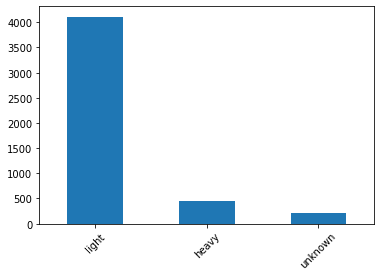

In [ ]:
df_train['class'].value_counts().plot(kind='bar', rot=45)

In [ ]:
df_val.shape

(1591, 6)

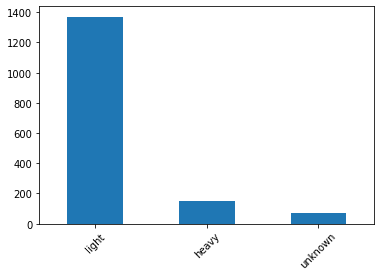

In [ ]:
df_val['class'].value_counts().plot(kind='bar', rot=45)